In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

In [213]:
dfx = pd.read_csv("healthdata.csv")
dfy = pd.read_csv("healthdata.csv")
dfo = pd.read_csv("healthdata.csv")

In [214]:
def laplaceMechanism(x, epsilon):
    x += np.random.laplace(0, 1.0/epsilon, 1)[0]
    return x

def gaussianMechanism(x, epsilon):
    delta = 1/30
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon
    x += np.random.normal(0, sigma, 1)[0]
    return x

In [215]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [216]:
dfy = dfy.iloc[1:]
dfx['age'] = dfx['age'].apply(laplaceMechanism, args=(0.5,))
dfy['age'] = dfy['age'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='problem'>

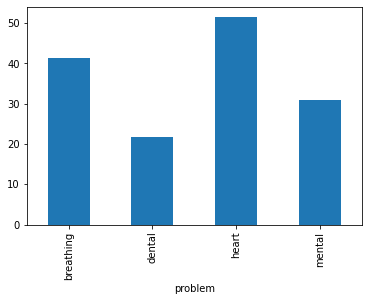

In [217]:
dfx.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

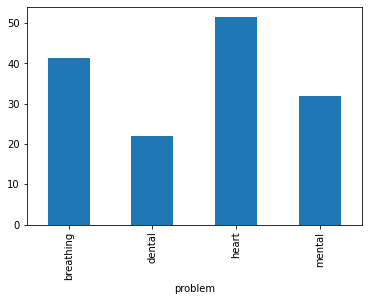

In [218]:
dfy.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

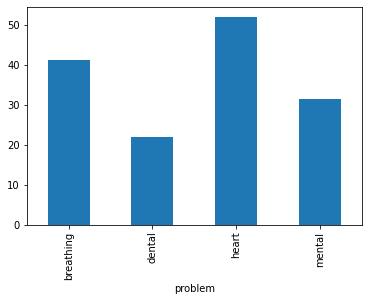

In [219]:
dfo.groupby("problem")['age'].mean().plot(kind='bar')

In [220]:
dfx['wage'] = dfx['wage'].apply(laplaceMechanism, args=(0.5,))
dfy['wage'] = dfy['wage'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='insured'>

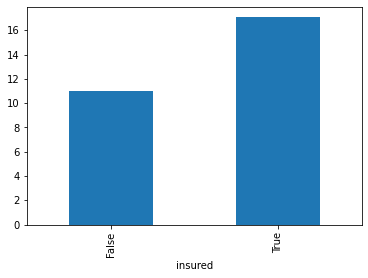

In [221]:
dfx.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

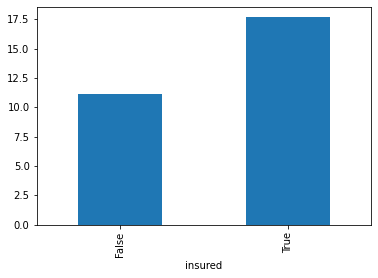

In [222]:
dfy.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

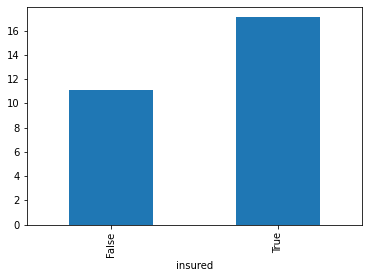

In [223]:
dfo.groupby("insured")['wage'].mean().plot(kind='bar')

In [224]:
epsilons = np.logspace(-2,1,25)
num_of_runs_for_epsilon = 10
df_original = pd.read_csv("healthdata.csv")

In [225]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        df_private = pd.read_csv("healthdata.csv")
        df_private['wage'] = df_private['wage'].apply(laplaceMechanism, args=(epsilon,))
        average_rmse.append(mean_squared_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist(), squared=False))
        average_mape.append(mean_absolute_percentage_error(df_original['wage']
                .to_numpy().tolist(), df_private['wage'].to_numpy().tolist()))
    laplace_rmse.append(np.mean(average_rmse))
    laplace_mape.append(np.mean(average_mape))

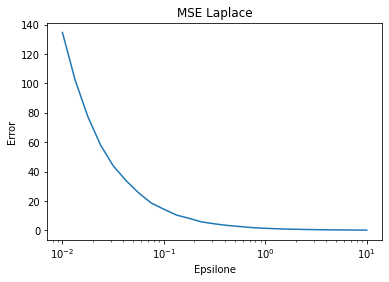

In [226]:
plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilone')
plt.ylabel('Error')
plt.title("MSE Laplace")
plt.show()

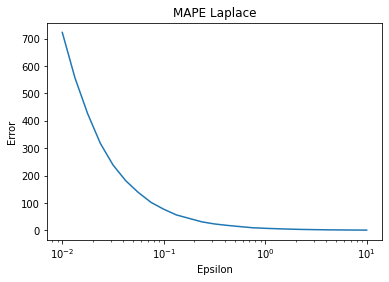

In [227]:
plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

In [228]:
gaussian_mse = []
gaussian_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
         df_private = pd.read_csv("healthdata.csv")
         df_private['wage'] = df_private['wage'].apply(gaussianMechanism, args=(epsilon,))
         average_rmse.append((mean_squared_error(df_original['wage'], 
                df_private['wage'].to_numpy().tolist(), squared=False)))
         average_mape.append(mean_absolute_percentage_error(df_original['wage']
                .to_numpy().tolist(),df_private['wage'].to_numpy().tolist()))

    gaussian_mse.append(np.mean(average_rmse))
    gaussian_mape.append(np.mean(average_mape))

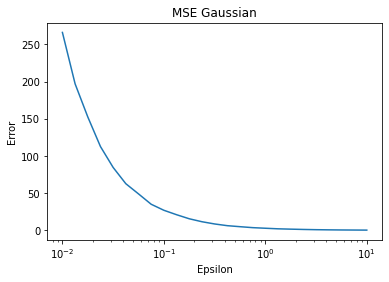

In [229]:
plt.semilogx(epsilons, gaussian_mse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MSE Gaussian")
plt.show()

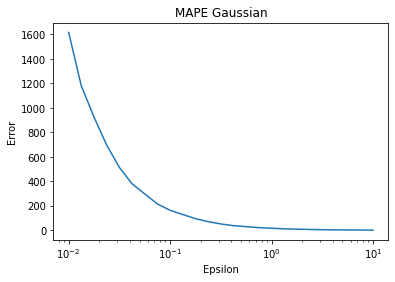

In [230]:
plt.semilogx(epsilons, gaussian_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Gaussian")
plt.show()